In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline
from IPython import display
sns.set(style="ticks")
data = pd.read_csv('Car_sales.csv')

In [ ]:
pd.set_option("display.width",70)
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Manufacturer', ('object', 0)),
 ('Model', ('object', 0)),
 ('Sales_in_thousands', ('float64', 0)),
 ('__year_resale_value', ('float64', 36)),
 ('Vehicle_type', ('object', 0)),
 ('Price_in_thousands', ('float64', 2)),
 ('Engine_size', ('float64', 1)),
 ('Horsepower', ('float64', 1)),
 ('Wheelbase', ('float64', 1)),
 ('Width', ('float64', 1)),
 ('Length', ('float64', 1)),
 ('Curb_weight', ('float64', 2)),
 ('Fuel_capacity', ('float64', 1)),
 ('Fuel_efficiency', ('float64', 3)),
 ('Latest_Launch', ('object', 0)),
 ('Power_perf_factor', ('float64', 2))]

In [ ]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('Manufacturer', 0.0),
 ('Model', 0.0),
 ('Sales_in_thousands', 0.0),
 ('__year_resale_value', 0.22929936305732485),
 ('Vehicle_type', 0.0),
 ('Price_in_thousands', 0.012738853503184714),
 ('Engine_size', 0.006369426751592357),
 ('Horsepower', 0.006369426751592357),
 ('Wheelbase', 0.006369426751592357),
 ('Width', 0.006369426751592357),
 ('Length', 0.006369426751592357),
 ('Curb_weight', 0.012738853503184714),
 ('Fuel_capacity', 0.006369426751592357),
 ('Fuel_efficiency', 0.01910828025477707),
 ('Latest_Launch', 0.0),
 ('Power_perf_factor', 0.012738853503184714)]

In [ ]:
continents=data["Manufacturer"].dropna().astype(str)
continents.value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [ ]:
le=sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(continents)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mercedes-B', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
continents_one_hot=pd.get_dummies(continents)
continents_one_hot.head()

,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,...,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
continents_one_hot[continents_one_hot["Ford"]==1].head()

,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,...,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo
46,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Power_perf_factor'])
data['Power_perf_factor'].unique()

array([ 58.28014952,  91.37077766,          nan,  91.38977933,
        62.7776392 ,  84.56510502, 134.6568582 ,  71.19120671,
        81.87706856,  83.9987238 ,  71.18145132,  95.63670253,
        85.82840825,  84.25452581, 113.8545976 , 115.6213578 ,
       113.7658739 ,  83.48309358, 109.5091165 ,  46.36334747,
        67.31446216,  69.9913956 ,  72.03091719,  81.11854333,
       141.14115   ,  48.2976361 ,  23.27627233,  71.83803944,
        65.95718396,  69.52135505,  80.02378204,  53.56619987,
       101.3292807 , 101.6552441 ,  52.08489875,  65.65050834,
        67.87610784,  80.83147017, 188.144323  ,  90.21170005,
        71.13529161,  70.07832154,  49.64500177,  92.85412522,
        61.22700031,  44.08370946,  76.50918456,  67.35101072,
        62.5037395 ,  43.11713201,  80.49953671,  87.63549578,
        62.09504839, 100.0248023 ,  47.38953131,  89.40193473,
        42.87909734,  54.26954829,  60.08796662,  83.6025008 ,
        85.21769134,  36.67228358,  54.59004516,  58.75

In [ ]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154])

In [ ]:
le.inverse_transform([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154])

array([ 23.27627233,  36.67228358,  39.98642475,  40.70007242,
        42.87909734,  43.11713201,  44.08370946,  45.83218056,
        46.36334747,  46.94387676,  47.32963226,  47.38953131,
        47.63823666,  47.94684106,  47.96897242,  48.2976361 ,
        48.67289791,  48.90737225,  49.64500177,  49.86577367,
        50.24197791,  50.99774761,  51.11347426,  51.95510887,
        52.08489875,  53.41189767,  53.56619987,  54.26954829,
        54.37241965,  54.59004516,  54.81972825,  55.29711658,
        56.29524304,  56.49603034,  58.28014952,  58.60677292,
        58.758249  ,  60.08796662,  60.72744693,  60.86161155,
        60.95118512,  61.22700031,  61.70138136,  62.0158703 ,
        62.09504839,  62.23996663,  62.35557713,  62.44196235,
        62.5037395 ,  62.7776392 ,  63.31372783,  65.65050834,
        65.95718396,  66.1130568 ,  66.4988123 ,  66.76294331,
        67.31446216,  67.35101072,  67.54415494,  67.7659076 ,
        67.87610784,  67.88927059,  69.52135505,  69.67

In [ ]:
data['Latest_Launch'].unique()

array(['2/2/2012', '6/3/2011', '1/4/2012', '3/10/2011', '10/8/2011',
       '8/9/2011', '2/27/2012', '6/28/2011', '1/29/2012', '4/4/2011',
       '11/2/2011', '9/3/2011', '3/23/2012', '7/23/2011', '2/23/2012',
       '4/29/2011', '11/27/2011', '9/28/2011', '4/17/2012', '8/17/2011',
       '3/19/2012', '5/24/2011', '12/22/2011', '10/23/2011', '5/12/2012',
       '9/11/2011', '4/13/2012', '6/18/2011', '1/16/2012', '11/17/2011',
       '6/6/2012', '10/6/2011', '5/8/2012', '7/13/2011', '2/10/2012',
       '12/12/2011', '7/1/2012', '10/31/2011', '6/2/2012', '8/7/2011',
       '3/6/2012', '1/6/2012', '7/26/2012', '11/25/2011', '6/27/2012',
       '9/1/2011', '3/31/2012', '1/31/2012', '8/20/2012', '12/20/2011',
       '7/22/2012', '9/26/2011', '4/25/2012', '2/25/2012', '9/14/2012',
       '1/14/2012', '8/16/2012', '10/21/2011', '5/20/2012', '3/21/2012',
       '10/9/2012', '2/8/2012', '9/10/2012', '11/15/2011', '6/14/2012',
       '4/15/2012', '11/3/2012', '3/4/2012', '10/5/2012', '12/10/2011

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#CountEncoder
from category_encoders.count import CountEncoder as ce_CountEncoder

In [ ]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['Vehicle_type'])])

In [ ]:
data_COUNT_ENC.head()

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Latest_Launch,Length,Manufacturer,Model,Power_perf_factor,Price_in_thousands,Sales_in_thousands,Wheelbase,Width,__year_resale_value
0,2.639,1.8,13.2,28.0,140.0,1,172.4,4,1,58.280150,21.50,16.919,101.2,67.3,16.360
1,3.517,3.2,17.2,25.0,225.0,1,192.9,4,1,91.370778,28.40,39.384,108.1,70.3,19.875
2,3.470,3.2,17.2,26.0,225.0,2,192.0,4,1,NaN,NaN,14.114,106.9,70.6,18.225
3,3.850,3.5,18.0,22.0,210.0,1,196.6,4,1,91.389779,42.00,8.588,114.6,71.4,29.725
4,2.998,1.8,16.4,27.0,150.0,1,178.0,3,1,62.777639,23.99,20.397,102.6,68.2,22.255


In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

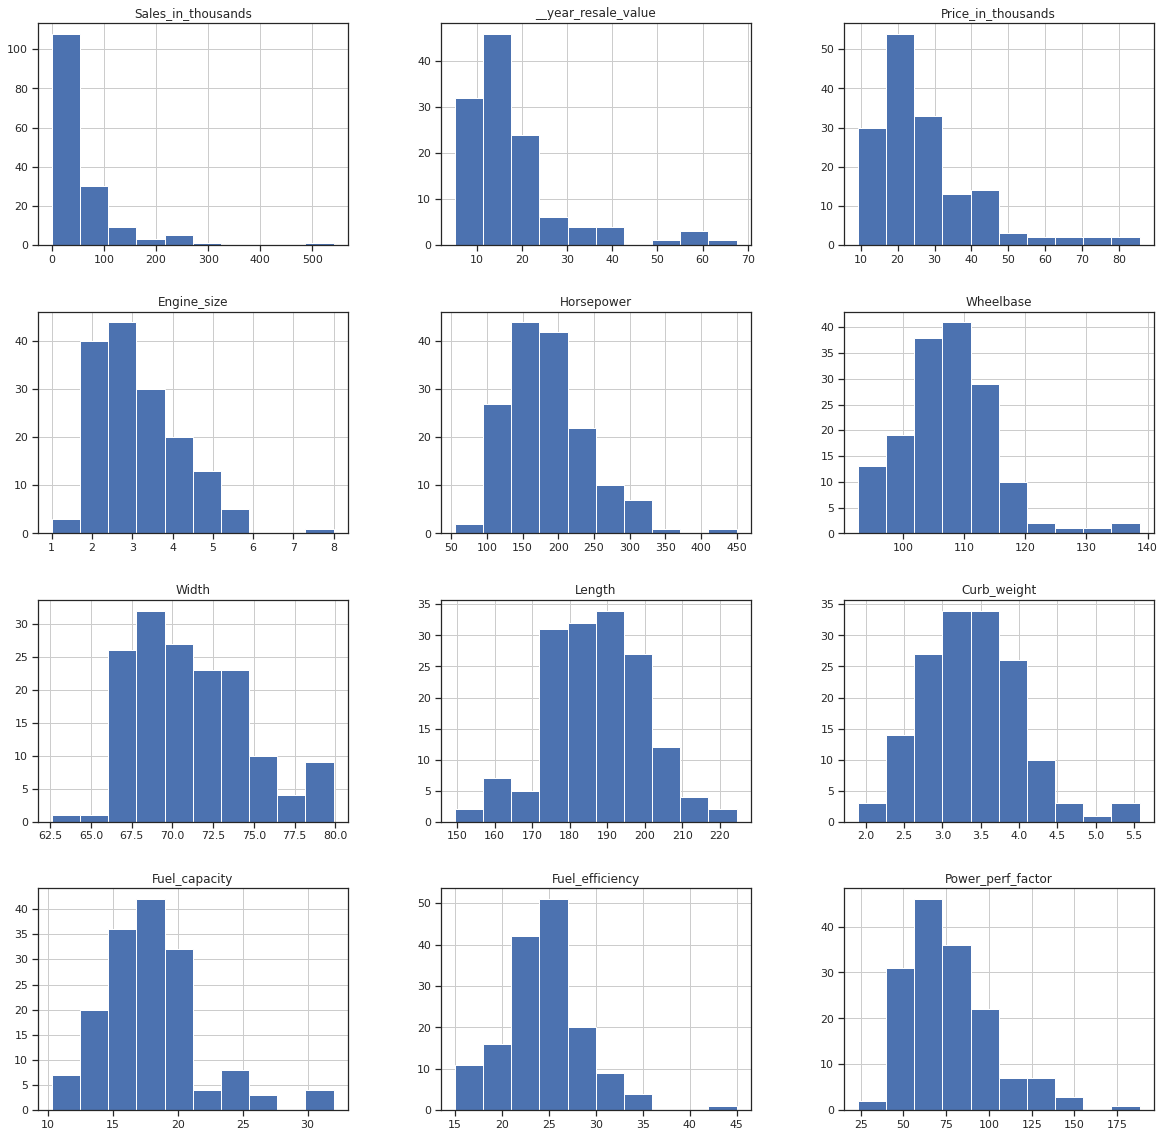

In [ ]:
data.hist(figsize=(20,20))
plt.show()

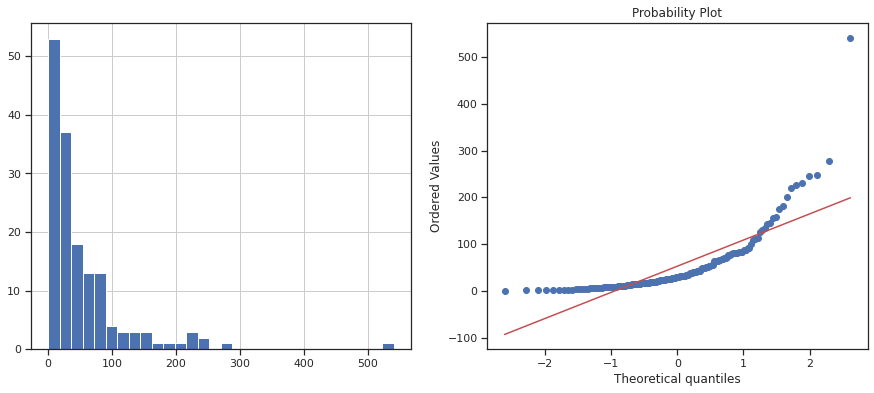

In [ ]:
diagnostic_plots(data, 'Sales_in_thousands')

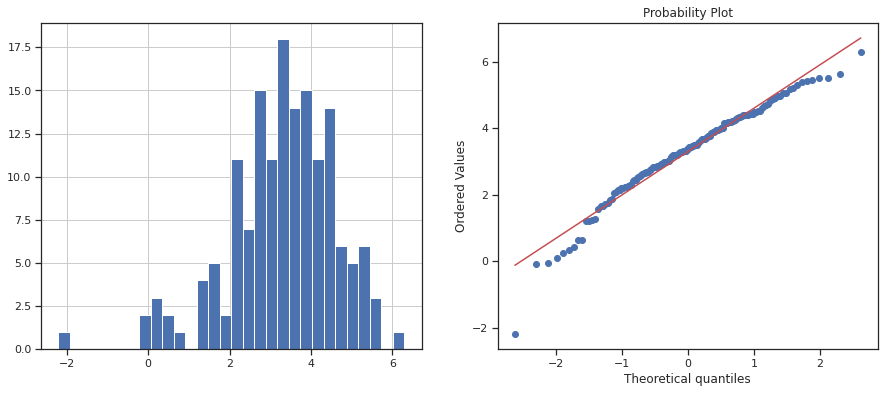

In [ ]:
#Логарифмическое преобразование
data['Sales_in_thousands'] = np.log(data['Sales_in_thousands'])
diagnostic_plots(data, 'Sales_in_thousands')

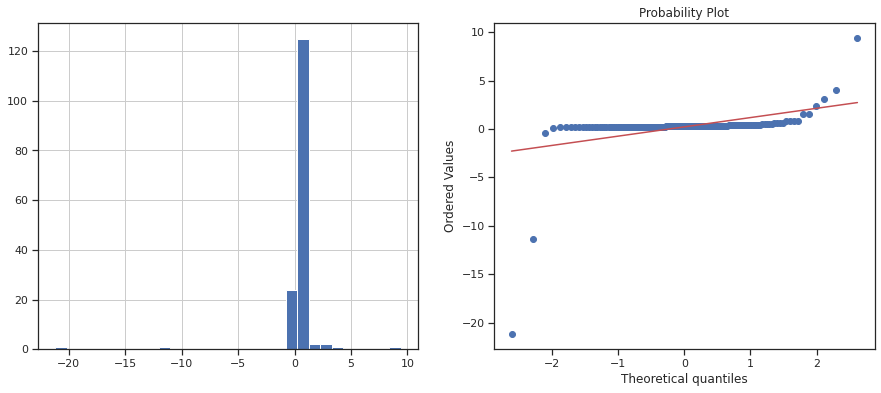

In [ ]:
#Обратное преобразование
data['Sales_in_thousands_reciprocal'] = 1 / (data['Sales_in_thousands']) 
diagnostic_plots(data, 'Sales_in_thousands_reciprocal')

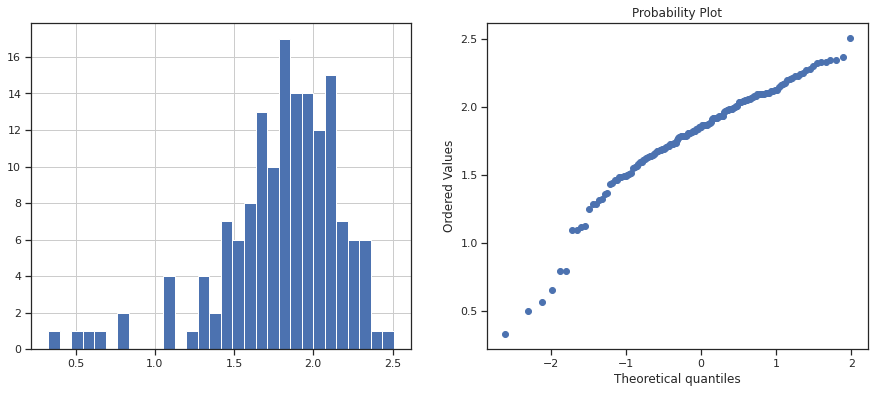

In [ ]:
#Квадратный корень
data['Sales_in_thousands_sqr'] = data['Sales_in_thousands']**(1/2) 
diagnostic_plots(data, 'Sales_in_thousands_sqr')

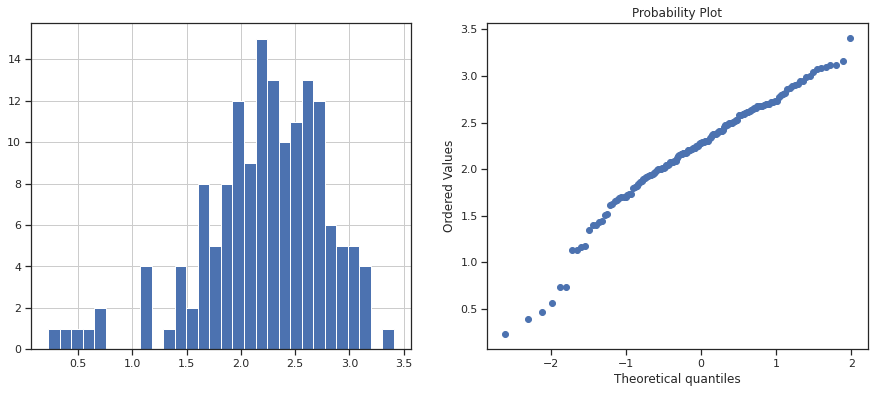

In [ ]:
#Возведение в степень
data['Sales_in_thousands_exp1'] = data['Sales_in_thousands']**(1/1.5)
diagnostic_plots(data, 'Sales_in_thousands_exp1')

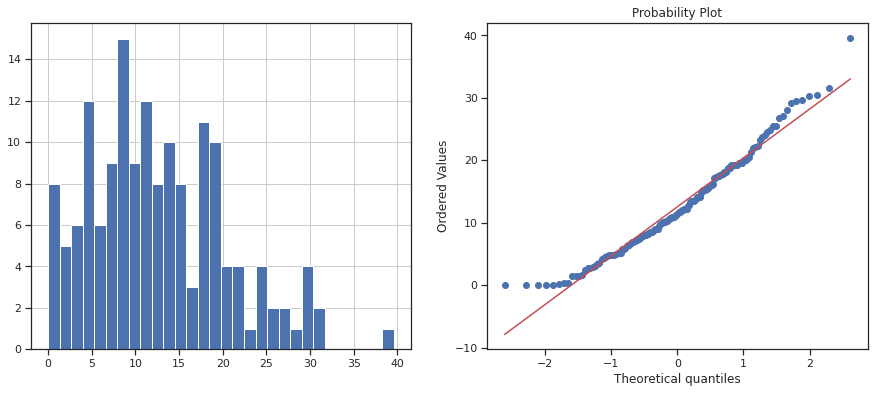

In [ ]:
data['Sales_in_thousands_exp2'] = data['Sales_in_thousands']**(2)
diagnostic_plots(data, 'Sales_in_thousands_exp2')

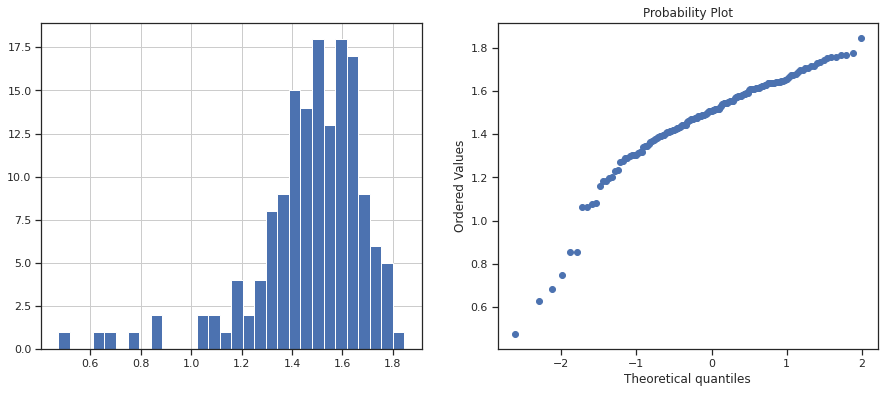

In [ ]:
data['Sales_in_thousands_exp3'] = data['Sales_in_thousands']**(0.333)
diagnostic_plots(data, 'Sales_in_thousands_exp3')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 149
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Manufacturer                   115 non-null    object 
 1   Model                          115 non-null    object 
 2   Sales_in_thousands             115 non-null    float64
 3   __year_resale_value            115 non-null    float64
 4   Vehicle_type                   115 non-null    object 
 5   Price_in_thousands             115 non-null    float64
 6   Engine_size                    115 non-null    float64
 7   Horsepower                     115 non-null    float64
 8   Wheelbase                      115 non-null    float64
 9   Width                          115 non-null    float64
 10  Length                         115 non-null    float64
 11  Curb_weight                    115 non-null    float64
 12  Fuel_capacity                  115 non-null    flo

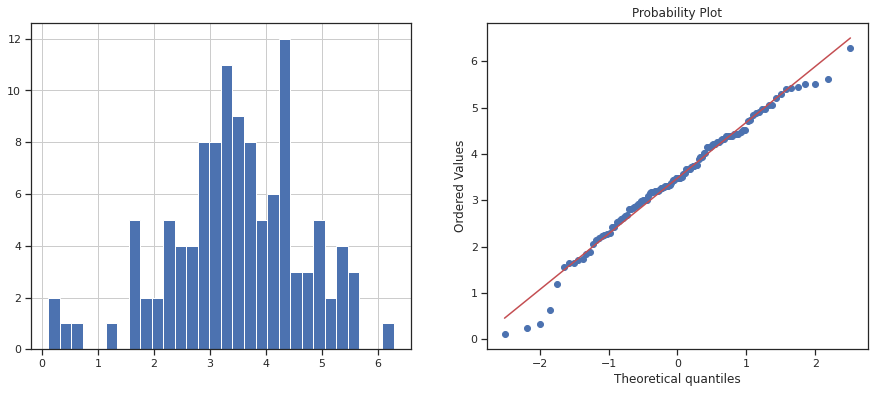

In [ ]:
data_clean = data.dropna()
data_clean.info()
diagnostic_plots(data_clean, 'Sales_in_thousands')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Оптимальное значение λ = 1.206410115045114


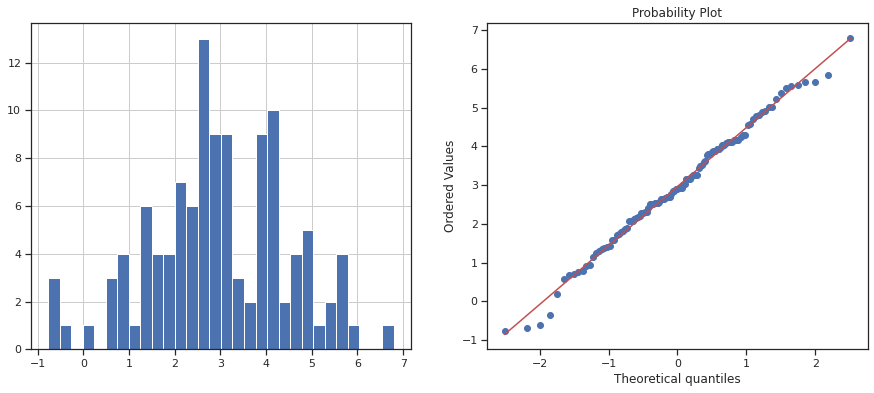

In [ ]:
data_clean['Sales_in_thousands_boxcox'], param = stats.boxcox(data_clean['Sales_in_thousands']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_clean, 'Sales_in_thousands_boxcox')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Оптимальное значение λ = 1.3971932373985305


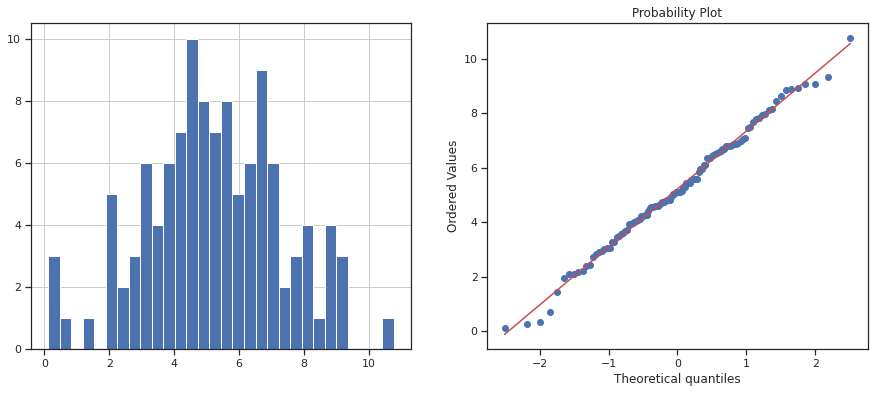

In [ ]:
data_clean['Sales_in_thousands'] = data_clean['Sales_in_thousands'].astype('float')
data_clean['Sales_in_thousands_yeojohnson'], param = stats.yeojohnson(data_clean['Sales_in_thousands']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_clean, 'Sales_in_thousands_yeojohnson')